# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from collections import Counter

## 1.1 Reading Data

In [6]:
!curl --header "Host: doc-0k-b8-docs.googleusercontent.com" --header "User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36" --header "Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header "Accept-Language: en-US,en;q=0.9" --header "Referer: https://drive.google.com/drive/folders/1E_8G-TVK8ZGb25OgytJ7NOV98pkKcmmN" --header "Cookie: AUTH_75gj45lm0i7pc3o1t8oprk1gk5mn6lhi_nonce=1fh1o4h0l3s4c; _ga=GA1.2.1245580049.1562348238" --header "Connection: keep-alive" "https://doc-0k-b8-docs.googleusercontent.com/docs/securesc/33fsahmr92289free56hh93kcifvni7b/8s4otie2d7opuevbv9dcvlpqae4aoqna/1575655200000/01431468197101903198/01431468197101903198/1aBvtzZJ2_WRrX8j8toIr8E10URWn6qgg?e=download&authuser=0&nonce=1fh1o4h0l3s4c&user=01431468197101903198&hash=ffgbdbgufuksnu58ffa3m9h7jkbjisj8" -o "Copy of train_data.csv" -L

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  191M    0  191M    0     0  69.6M      0 --:--:--  0:00:02 --:--:-- 69.5M


In [7]:
!curl --header "Host: doc-0o-b8-docs.googleusercontent.com" --header "User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36" --header "Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header "Accept-Language: en-US,en;q=0.9" --header "Referer: https://drive.google.com/drive/folders/1E_8G-TVK8ZGb25OgytJ7NOV98pkKcmmN" --header "Cookie: AUTH_75gj45lm0i7pc3o1t8oprk1gk5mn6lhi=01431468197101903198|1575655200000|g15o2vjc19mtimhbhs1d6d4d41k8ureb; _ga=GA1.2.1245580049.1562348238" --header "Connection: keep-alive" "https://doc-0o-b8-docs.googleusercontent.com/docs/securesc/33fsahmr92289free56hh93kcifvni7b/ll1igukkubr5ljo7vt1jr0o979surv78/1575655200000/01431468197101903198/01431468197101903198/1NYzoGBgQORqKyXs3T0Lsd_qcPverkM3o?e=download&authuser=0" -o "Copy of resources.csv" -L

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  121M    0  121M    0     0  58.7M      0 --:--:--  0:00:02 --:--:-- 58.7M


In [0]:
train_data= pd.read_csv('Copy of train_data.csv', na_values=' ')
resource_data = pd.read_csv('Copy of resources.csv', na_values=' ')



In [0]:
df=pd.DataFrame(train_data)

In [0]:
project_data=df

In [11]:
print("Number of data points in train data",project_data.shape)
print('*'*50)
print("The attributes of data:",project_data.columns.values)

Number of data points in train data (109248, 17)
**************************************************
The attributes of data: ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [12]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Math & Science,"Applied Sciences, Health & Life Science",Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1
76127,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Special Needs,Special Needs,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1


In [13]:
print("Number of data points in resource data",resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in resource data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


In [14]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


## 1.2 preprocessing of `project_subject_categories`

In [0]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [0]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [0]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [18]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1,Math_Science,AppliedSciences Health_LifeScience,I have been fortunate enough to use the Fairy ...
76127,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1,SpecialNeeds,SpecialNeeds,Imagine being 8-9 years old. You're in your th...


In [19]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)

I have been fortunate enough to use the Fairy Tale STEM kits in my classroom as well as the STEM journals, which my students really enjoyed.  I would love to implement more of the Lakeshore STEM kits in my classroom for the next school year as they provide excellent and engaging STEM lessons.My students come from a variety of backgrounds, including language and socioeconomic status.  Many of them don't have a lot of experience in science and engineering and these kits give me the materials to provide these exciting opportunities for my students.Each month I try to do several science or STEM/STEAM projects.  I would use the kits and robot to help guide my science instruction in engaging and meaningful ways.  I can adapt the kits to my current language arts pacing guide where we already teach some of the material in the kits like tall tales (Paul Bunyan) or Johnny Appleseed.  The following units will be taught in the next school year where I will implement these kits: magnets, motion, si

In [0]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [0]:
sent = decontracted(project_data['essay'].values[20000])

In [0]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')

In [0]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)

In [0]:
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [25]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())
project_data['preprocessed_essays'] = preprocessed_essays

100%|██████████| 109248/109248 [00:54<00:00, 2022.08it/s]


In [26]:
# after preprocesing
project_data.head(3)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,preprocessed_essays
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1,Math_Science,AppliedSciences Health_LifeScience,I have been fortunate enough to use the Fairy ...,fortunate enough use fairy tale stem kits clas...
76127,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1,SpecialNeeds,SpecialNeeds,Imagine being 8-9 years old. You're in your th...,imagine 8 9 years old third grade classroom se...
51140,74477,p189804,4a97f3a390bfe21b99cf5e2b81981c73,Mrs.,CA,2016-04-27 00:46:53,Grades PreK-2,Mobile Learning with a Mobile Listening Center,Having a class of 24 students comes with diver...,I have a class of twenty-four kindergarten stu...,By having a mobile listening and storage cente...,A mobile listening center will help keep equip...,My students need a mobile listening center to ...,10,1,Literacy_Language,Literacy,Having a class of 24 students comes with diver...,class 24 students comes diverse learners stude...


<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [27]:
# printing some random essays.
print(project_data['project_title'].values[0])
print("="*50)
print(project_data['project_title'].values[150])
print("="*50)
print(project_data['project_title'].values[1000])

Engineering STEAM into the Primary Classroom
Building Blocks for Learning
Empowering Students Through Art:Learning About Then and Now


In [28]:
# Combining all the above statemennts 
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles.append(sent.lower().strip())
project_data['preprocessed_titles'] = preprocessed_titles

100%|██████████| 109248/109248 [00:02<00:00, 47491.79it/s]


In [29]:
project_data.head(3)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,preprocessed_essays,preprocessed_titles
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,1,Math_Science,AppliedSciences Health_LifeScience,I have been fortunate enough to use the Fairy ...,fortunate enough use fairy tale stem kits clas...,engineering steam primary classroom
76127,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,1,SpecialNeeds,SpecialNeeds,Imagine being 8-9 years old. You're in your th...,imagine 8 9 years old third grade classroom se...,sensory tools focus
51140,74477,p189804,4a97f3a390bfe21b99cf5e2b81981c73,Mrs.,CA,2016-04-27 00:46:53,Grades PreK-2,Mobile Learning with a Mobile Listening Center,Having a class of 24 students comes with diver...,I have a class of twenty-four kindergarten stu...,By having a mobile listening and storage cente...,A mobile listening center will help keep equip...,My students need a mobile listening center to ...,10,1,Literacy_Language,Literacy,Having a class of 24 students comes with diver...,class 24 students comes diverse learners stude...,mobile learning mobile listening center


## 1.4.1 Project_grade preprocessing

In [30]:
project_data['project_grade_category'][:4]

55660    Grades PreK-2
76127       Grades 3-5
51140    Grades PreK-2
473      Grades PreK-2
Name: project_grade_category, dtype: object

In [31]:
project_data['project_grade_category'] = project_data['project_grade_category'].str.replace(" ", "_")
project_data['project_grade_category'].value_counts()

Grades_PreK-2    44225
Grades_3-5       37137
Grades_6-8       16923
Grades_9-12      10963
Name: project_grade_category, dtype: int64

### Preprocessing teacher_prefix

In [32]:
project_data['teacher_prefix'][:4]

55660    Mrs.
76127     Ms.
51140    Mrs.
473      Mrs.
Name: teacher_prefix, dtype: object

In [33]:
project_data['teacher_prefix'] = project_data['teacher_prefix'].str.replace(".","")
project_data['teacher_prefix'].value_counts()

Mrs        57269
Ms         38955
Mr         10648
Teacher     2360
Dr            13
Name: teacher_prefix, dtype: int64

## 1.5 Preparing data for models

In [34]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay',
       'preprocessed_essays', 'preprocessed_titles'],
      dtype='object')

we are going to consider

       
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - school_state : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - preprocessed_titles: text data
       - preprocessed_essays : text data

       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### Split data into train,test and Cross validate

In [0]:
Y = project_data['project_is_approved'].values
project_data.drop(['project_is_approved'], axis=1, inplace=True)

In [36]:
X = project_data
X.head(1)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,preprocessed_essays,preprocessed_titles
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs,CA,2016-04-27 00:27:36,Grades_PreK-2,Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,Math_Science,AppliedSciences Health_LifeScience,I have been fortunate enough to use the Fairy ...,fortunate enough use fairy tale stem kits clas...,engineering steam primary classroom


In [0]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y)


### 1.5.1 Vectorizing Categorical data

### One Hot Encode - Clean_Categories

In [38]:
# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer= CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_categories'].values)
vectorizer_proj=vectorizer


categories_one_hot_train = vectorizer.transform(X_train['clean_categories'].values)
categories_one_hot_test = vectorizer.transform(X_test['clean_categories'].values)


print("Shape of Train data - one hot encoding ",categories_one_hot_train.shape)
print("Shape of Test data - one hot encoding ",categories_one_hot_test.shape)
print(vectorizer.get_feature_names())

Shape of Train data - one hot encoding  (81936, 9)
Shape of Test data - one hot encoding  (27312, 9)
['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']


### One Hot Encode - Clean_Sub-Categories

In [39]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer

vectorizer= CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)

vectorizer.fit(X_train['clean_subcategories'].values)
vectorizer_sub_proj=vectorizer
sub_cat_one_hot_train = vectorizer.transform(X_train['clean_subcategories'].values)
sub_cat_one_hot_test = vectorizer.transform(X_test['clean_subcategories'].values)


print("Shape of Train data - one hot encoding ",sub_cat_one_hot_train.shape)
print("Shape of Test data - one hot encoding",sub_cat_one_hot_test.shape)
print(vectorizer.get_feature_names())

Shape of Train data - one hot encoding  (81936, 30)
Shape of Test data - one hot encoding (27312, 30)
['Economics', 'CommunityService', 'FinancialLiteracy', 'ParentInvolvement', 'Extracurricular', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'Health_LifeScience', 'EarlyDevelopment', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']


### One Hot Encode - School_States

In [0]:
my_counter = Counter()
for state in project_data['school_state'].values:
    my_counter.update(state.split())

In [0]:
school_state_cat_dict = dict(my_counter)
sorted_school_state_cat_dict = dict(sorted(school_state_cat_dict.items(), key=lambda kv: kv[1]))

In [42]:
## we use count vectorizer to convert the values into one hot encoded features

vectorizer= CountVectorizer(vocabulary=list(sorted_school_state_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['school_state'].values)
vectorizer_states=vectorizer
school_state_one_hot_train = vectorizer.transform(X_train['school_state'].values)
school_state_one_hot_test = vectorizer.transform(X_test['school_state'].values)

print("Shape of Train data - one hot encoding",school_state_one_hot_train.shape)
print("Shape of Test data - one hot encoding",school_state_one_hot_test.shape)
print(vectorizer.get_feature_names())

Shape of Train data - one hot encoding (81936, 51)
Shape of Test data - one hot encoding (27312, 51)
['VT', 'WY', 'ND', 'MT', 'RI', 'SD', 'NE', 'DE', 'AK', 'NH', 'WV', 'ME', 'HI', 'DC', 'NM', 'KS', 'IA', 'ID', 'AR', 'CO', 'MN', 'OR', 'KY', 'MS', 'NV', 'MD', 'CT', 'TN', 'UT', 'AL', 'WI', 'VA', 'AZ', 'NJ', 'OK', 'WA', 'MA', 'LA', 'OH', 'MO', 'IN', 'PA', 'MI', 'SC', 'GA', 'IL', 'NC', 'FL', 'NY', 'TX', 'CA']


### One Hot Encode - Project_Grade_Category

In [0]:
my_counter = Counter()
for project_grade in project_data['project_grade_category'].values:
    my_counter.update(project_grade.split())

In [0]:
project_grade_cat_dict = dict(my_counter)
sorted_project_grade_cat_dict = dict(sorted(project_grade_cat_dict.items(), key=lambda kv: kv[1]))

In [45]:
## we use count vectorizer to convert the values into one hot encoded features

vectorizer = CountVectorizer(vocabulary=list(sorted_project_grade_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['project_grade_category'].values)
vectorizer_grade=vectorizer
project_grade_cat_one_hot_train = vectorizer.transform(X_train['project_grade_category'].values)
project_grade_cat_one_hot_test = vectorizer.transform(X_test['project_grade_category'].values)


print("Shape of Train data - one hot encoding",project_grade_cat_one_hot_train.shape)
print("Shape of Test data - one hot encoding",project_grade_cat_one_hot_test.shape)
print(vectorizer.get_feature_names())

Shape of Train data - one hot encoding (81936, 4)
Shape of Test data - one hot encoding (27312, 4)
['Grades_9-12', 'Grades_6-8', 'Grades_3-5', 'Grades_PreK-2']


### One Hot Encode - Teacher_Prefix

In [0]:
my_counter = Counter()
for teacher_prefix in project_data['teacher_prefix'].values:
    teacher_prefix = str(teacher_prefix)
    my_counter.update(teacher_prefix.split())

In [0]:
teacher_prefix_cat_dict = dict(my_counter)
sorted_teacher_prefix_cat_dict = dict(sorted(teacher_prefix_cat_dict.items(), key=lambda kv: kv[1]))

In [48]:
vectorizer = CountVectorizer(vocabulary=list(sorted_teacher_prefix_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['teacher_prefix'].values.astype("U"))
vectorizer_teacher=vectorizer
teacher_prefix_cat_one_hot_train = vectorizer.transform(X_train['teacher_prefix'].values.astype("U"))
teacher_prefix_cat_one_hot_test = vectorizer.transform(X_test['teacher_prefix'].values.astype("U"))

print("Shape of Train data - one hot encoding",teacher_prefix_cat_one_hot_train.shape)
print("Shape of Test data - one hot encoding ",teacher_prefix_cat_one_hot_test.shape)

print(vectorizer.get_feature_names())

Shape of Train data - one hot encoding (81936, 6)
Shape of Test data - one hot encoding  (27312, 6)
['nan', 'Dr', 'Teacher', 'Mr', 'Ms', 'Mrs']


### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

### BOW of eassys - FOr Train/Test/CV Datasets

In [49]:
vectorizer = CountVectorizer(min_df=10)# its a countvectors used for convert text to vectors
vectorizer.fit(X_train['preprocessed_essays'])

vectorizer_bow_essay =vectorizer
# BOW for essays Train Data
essay_bow_train = vectorizer.transform(X_train['preprocessed_essays'])
print(essay_bow_train.shape,Y_train.shape)


# BOW for essays Test Data
essay_bow_test = vectorizer.transform(X_test['preprocessed_essays'])
print(essay_bow_test.shape,Y_test.shape)



(81936, 14770) (81936,)
(27312, 14770) (27312,)


#### BOW of Project Titles - Train/Test/CV Data¶

In [50]:
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(X_train['preprocessed_titles'])
vectorizer_bow_title = vectorizer


# BOW for title Train Data
title_bow_train = vectorizer.transform(X_train['preprocessed_titles'])
print(title_bow_train.shape,Y_train.shape)


# BOW for title Test Data
title_bow_test = vectorizer.transform(X_test['preprocessed_titles'])
print(title_bow_test.shape,Y_test.shape)



(81936, 2798) (81936,)
(27312, 2798) (27312,)


#### 1.5.2.2 TFIDF vectorizer for essay

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)# its a countvectors used for convert text to vectors

vectorizer.fit(X_train['preprocessed_essays'])
vectorizer_tfidf_essay=vectorizer

#tidf Train Data
essay_tfidf_train = vectorizer.transform(X_train['preprocessed_essays'])
print(essay_tfidf_train.shape,Y_train.shape)


#tidf Test Data
essay_tfidf_test = vectorizer.transform(X_test['preprocessed_essays'])
print(essay_tfidf_test.shape,Y_test.shape)




(81936, 14770) (81936,)
(27312, 14770) (27312,)


#### TFIDF vectorizer for Title

In [52]:
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(X_train['preprocessed_titles'])
vectorizer_tfidf_titles=vectorizer

#tidf Train Data
title_tfidf_train = vectorizer.transform(X_train['preprocessed_titles'])
print(title_tfidf_train.shape,Y_train.shape)


#tidf Test Data
title_tfidf_test = vectorizer.transform(X_test['preprocessed_titles'])
print(title_tfidf_test.shape,Y_test.shape)



(81936, 2798) (81936,)
(27312, 2798) (27312,)


### Using Pretrained Models: Avg W2V


In [55]:
!curl --header "Host: doc-0s-bk-docs.googleusercontent.com" --header "User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36" --header "Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header "Accept-Language: en-US,en;q=0.9" --header "Referer: https://drive.google.com/drive/search?q=glove" --header "Cookie: AUTH_75gj45lm0i7pc3o1t8oprk1gk5mn6lhi=01431468197101903198|1575655200000|g15o2vjc19mtimhbhs1d6d4d41k8ureb; _ga=GA1.2.1245580049.1562348238" --header "Connection: keep-alive" "https://doc-0s-bk-docs.googleusercontent.com/docs/securesc/33fsahmr92289free56hh93kcifvni7b/saoc2c9ck1tglorft8fc1f0ajsb8iggb/1575655200000/06629147635963609455/01431468197101903198/1Z6bjXmyCaoEzXYo_tRDwLTsfeA2F3K3j?e=download&authuser=0" -o "glove_vectors" -L

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  121M    0  121M    0     0  82.3M      0 --:--:--  0:00:01 --:--:-- 82.2M


In [0]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [0]:
# average Word2Vec Function
# computing average word2vec for each review.
# the avg-w2v for each sentence/review is stored in this list
def avg_w2v_vectors_func(sentance):
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    return vector

#### Train/Test/CV  Data - Avg-W2V for essay

In [58]:
essay_avg_w2v_train = []
essay_avg_w2v_test  = []
# Avg-w2v for Train data
for sentence in tqdm(X_train['preprocessed_essays']):
    essay_avg_w2v_train.append(avg_w2v_vectors_func(sentance)) 
    
# Avg-w2v for Train data    
print("len(essay_avg_w2v_train):",len(essay_avg_w2v_train))
print("len(essay_avg_w2v_train[0])",len(essay_avg_w2v_train[0]))
# Avg-w2v for Test data
for sentence in tqdm(X_test['preprocessed_essays']):
    essay_avg_w2v_test.append(avg_w2v_vectors_func(sentance)) 


print("len(essay_avg_w2v_test):",len(essay_avg_w2v_test))
print("len(essay_avg_w2v_test[0])",len(essay_avg_w2v_test[0]))




  2%|▏         | 484/27312 [00:00<00:05, 4835.42it/s]

len(essay_avg_w2v_train): 81936
len(essay_avg_w2v_train[0]) 300


100%|██████████| 27312/27312 [00:05<00:00, 4721.95it/s]

len(essay_avg_w2v_test): 27312
len(essay_avg_w2v_test[0]) 300


#### Train/Test/CV Data - Avg-W2V for title

In [59]:
title_avg_w2v_train = []
title_avg_w2v_test  = []

for sentence in tqdm(X_train['preprocessed_titles']):
    title_avg_w2v_train.append(avg_w2v_vectors_func(sentance)) # Avg-w2v for Train data
    
# Avg-w2v for Train data    
print("len(title_avg_w2v_train):",len(title_avg_w2v_train))
print("len(title_avg_w2v_train[0])",len(title_avg_w2v_train[0]))

for sentence in tqdm(X_test['preprocessed_titles']):
    title_avg_w2v_test.append(avg_w2v_vectors_func(sentance)) # Avg-w2v for Test data

# Avg-w2v for Test data
print("len(title_avg_w2v_test):",len(title_avg_w2v_test))
print("len(title_avg_w2v_test[0])",len(title_avg_w2v_test[0]))





 28%|██▊       | 7742/27312 [00:00<00:00, 77417.12it/s]

len(title_avg_w2v_train): 81936
len(title_avg_w2v_train[0]) 300


100%|██████████| 27312/27312 [00:00<00:00, 76027.71it/s]

len(title_avg_w2v_test): 27312
len(title_avg_w2v_test[0]) 300


####  Using Pretrained Models: TFIDF weighted W2V

In [0]:
tfidf_model = TfidfVectorizer()
tfidf_model.fit(X_train['preprocessed_essays'])
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [0]:
# Compute  TFIDF weighted W2V for each sentence of the review.

def tf_idf_weight_func(sentence): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    return vector

#### Train/Test/CV Data - TFIDF weighted W2V for essays

In [62]:
essay_tfidf_w2v_train = []
essay_tfidf_w2v_test  = []
#  TFIDF weighted W2V for Train data
for sentence in tqdm(X_train['preprocessed_essays']):
    essay_tfidf_w2v_train.append(tf_idf_weight_func(sentance)) 
print("len(essay_tfidf_w2v_train)",len(essay_tfidf_w2v_train))
print("len(essay_tfidf_w2v_train[0])",len(essay_tfidf_w2v_train[0]))

#  TFIDF weighted W2V for Test data
for sentence in tqdm(X_test['preprocessed_essays']):
    essay_tfidf_w2v_test.append(tf_idf_weight_func(sentance)) 
print("len(essay_tfidf_w2v_test)",len(essay_tfidf_w2v_test))
print("len(essay_tfidf_w2v_test[0])",len(essay_tfidf_w2v_test[0]))



100%|██████████| 27312/27312 [00:00<00:00, 306413.50it/s]

len(essay_tfidf_w2v_train) 81936
len(essay_tfidf_w2v_train[0]) 300
len(essay_tfidf_w2v_test) 27312
len(essay_tfidf_w2v_test[0]) 300


#### Train/Test/CV Data - TFIDF weighted W2V for Project Titles


In [63]:
title_tfidf_w2v_train  = []
title_tfidf_w2v_test  = []

for sentence in tqdm(X_train['preprocessed_titles']):
    title_tfidf_w2v_train.append(tf_idf_weight_func(sentance)) #  TFIDF weighted W2V for Train data
print("len(title_tfidf_w2v_train)",len(title_tfidf_w2v_train))
print("len(title_tfidf_w2v_train[0])",len(title_tfidf_w2v_train[0]))

for sentence in tqdm(X_test['preprocessed_titles']):
    title_tfidf_w2v_test.append(tf_idf_weight_func(sentance)) #  TFIDF weighted W2V for Test data
print("len(title_tfidf_w2v_test)",len(title_tfidf_w2v_test))
print("len(title_tfidf_w2v_test[0])",len(title_tfidf_w2v_test[0]))



100%|██████████| 27312/27312 [00:00<00:00, 304007.34it/s]

len(title_tfidf_w2v_train) 81936
len(title_tfidf_w2v_train[0]) 300
len(title_tfidf_w2v_test) 27312
len(title_tfidf_w2v_test[0]) 300


### 1.5.3 Vectorizing Numerical features

In [64]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
price_data.head(3)

,id,price,quantity
0,p000001,459.56,7
1,p000002,515.89,21
2,p000003,298.97,4


In [0]:
X_train = pd.merge(X_train, price_data, on='id', how='left')
X_test = pd.merge(X_test, price_data, on='id', how='left')


In [66]:

from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train['price'].values.reshape(1,-1))

price_data_train = normalizer.transform(X_train['price'].values.reshape(-1,1))

price_data_test = normalizer.transform(X_test['price'].values.reshape(-1,1))


print("After vectorizations")
print("="*100)
print(price_data_train.shape, Y_train.shape)
print(price_data_test.shape, Y_test.shape)
print("="*100)

After vectorizations
(81936, 1) (81936,)
(27312, 1) (27312,)


#### Vectorizing Quantity Feature

In [67]:
normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train['quantity'].values.reshape(1,-1))

quant_train = normalizer.transform(X_train['quantity'].values.reshape(-1,1))
quant_test = normalizer.transform(X_test['quantity'].values.reshape(-1,1))

print("="*100)
print("After vectorizations")
print(quant_train.shape, Y_train.shape)
print(quant_test.shape, Y_test.shape)
print("="*100)

After vectorizations
(81936, 1) (81936,)
(27312, 1) (27312,)


####  Vectorizing teacher_number_of_previously_posted_projects 

In [68]:
normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

prev_no_projects_train = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
prev_no_projects_test = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("="*100)
print("After vectorizations")
print(prev_no_projects_train.shape, Y_train.shape)
print(prev_no_projects_test.shape, Y_test.shape)
print("="*100)

After vectorizations
(81936, 1) (81936,)
(27312, 1) (27312,)


# Assignment 7: SVM

<ol>
    <li><strong>[Task-1] Apply Support Vector Machines(SGDClassifier with hinge loss: Linear SVM) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (best alpha in range [10^-4 to 10^4], and the best penalty among 'l1', 'l2')</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning
        </ul>
            </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2] Apply the Support Vector Machines on these features by finding the best hyper paramter as suggested in step 2 and step 3</strong>
        <ul>
    <li> Consider these set of features <font color='red'> Set 5 :</font>
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
                <li><strong>Apply <a href='http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html'>TruncatedSVD</a> on <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html'>TfidfVectorizer</a> of essay text, choose the number of components (`n_components`) using <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/pca-code-example-using-non-visualization/'>elbow method</a></strong> : numerical data</li>
            </ul>
         <br>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h1>2. Support Vector Machines </h1>

### 2.4.1 Applying Logistic Regression brute force on BOW,<font color='red'> SET 1</font>

In [69]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train_merge = hstack((categories_one_hot_train, sub_cat_one_hot_train, school_state_one_hot_train, project_grade_cat_one_hot_train, teacher_prefix_cat_one_hot_train, price_data_train, quant_train, prev_no_projects_train,title_bow_train, essay_bow_train)).tocsr()
X_test_merge = hstack((categories_one_hot_test, sub_cat_one_hot_test, school_state_one_hot_test, project_grade_cat_one_hot_test, teacher_prefix_cat_one_hot_test,price_data_test,quant_test,prev_no_projects_test,title_bow_test, essay_bow_test)).tocsr()

print("Final Data matrix")
print("="*100)
print(X_train_merge.shape, Y_train.shape)
print(X_test_merge.shape, Y_test.shape)
print("="*100)

Final Data matrix
(81936, 17671) (81936,)
(27312, 17671) (27312,)


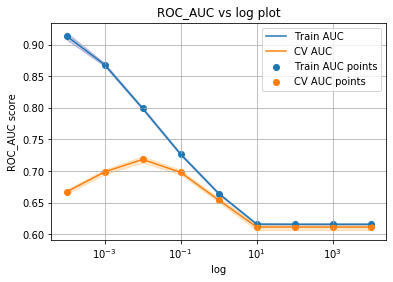

In [70]:
## By using "l2" Regulrizer

import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.model_selection import learning_curve, GridSearchCV

# hyperparameter tuning with l2 reg


sd = SGDClassifier(loss = 'hinge', penalty = 'l2', class_weight = 'balanced')
parameters = {'alpha':[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}
classifier = GridSearchCV(sd, parameters, cv= 3, scoring='roc_auc',return_train_score=True)
classifier.fit(X_train_merge, Y_train);

train_auc = classifier.cv_results_['mean_train_score']
train_auc_std= classifier.cv_results_['std_train_score']
cv_auc = classifier.cv_results_['mean_test_score'] 
cv_auc_std= classifier.cv_results_['std_test_score']


plt.plot(parameters['alpha'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['alpha'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')
plt.plot(parameters['alpha'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['alpha'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')


plt.legend()
plt.xscale('log') 
plt.xlabel("log")
plt.ylabel("ROC_AUC score")
plt.title("ROC_AUC vs log plot")
plt.grid()
plt.show()



In [71]:
score_t_cv = [x for x in cv_auc]
opt_t_cv = parameters['alpha'][score_t_cv.index(max(score_t_cv))]
print("Maximum AUC score of cv is:" + ' ' + str(max(score_t_cv)))
print("Corresponding Alpha value of cv is:",opt_t_cv, '\n')
best_alp=opt_t_cv
print(best_alp)


Maximum AUC score of cv is: 0.7182944427687886
Corresponding Alpha value of cv is: 0.01 

0.01


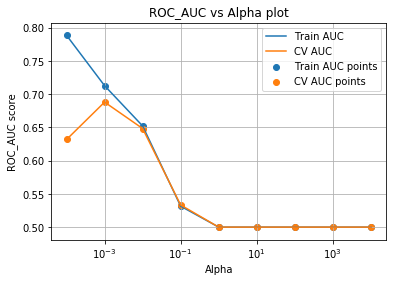

In [72]:
#By using  "l1" Regularization
# hyperparameter tuning with l1 reg
#parameters = {'alpha':[0.007,0.009,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.2,1.4,1.6,1.8,2,2.2,2.4,2.6,2.8,3,3,3.5,4,4.5,5]}
import warnings
warnings.filterwarnings("ignore")
parameters = {'alpha':[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}
sd = SGDClassifier(loss = 'hinge', penalty = 'l1', class_weight = 'balanced')
classifier = GridSearchCV(sd, parameters, cv= 5, scoring='roc_auc',return_train_score=True)
classifier.fit(X_train_merge, Y_train)
train_auc = classifier.cv_results_['mean_train_score']
cv_auc= classifier.cv_results_['mean_test_score']

plt.plot(parameters['alpha'], train_auc, label='Train AUC')
plt.plot(parameters['alpha'], cv_auc, label='CV AUC')


plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("Alpha")
plt.xscale('log')
plt.ylabel("ROC_AUC score")
plt.title("ROC_AUC vs Alpha plot")
plt.grid()
plt.show()



In [73]:
score_t_cv = [x for x in cv_auc]
opt_t_cv = parameters['alpha'][score_t_cv.index(max(score_t_cv))]
print("Maximum AUC score of cv is:" + ' ' + str(max(score_t_cv)))
print("Corresponding lambda value of cv is:",opt_t_cv, '\n')
best_alp=opt_t_cv
print(best_alp)


Maximum AUC score of cv is: 0.6880081066230584
Corresponding lambda value of cv is: 0.001 

0.001


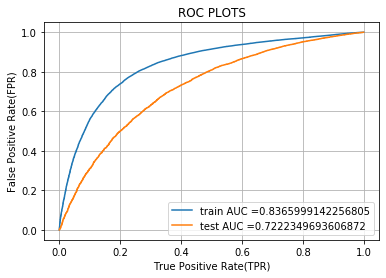

In [74]:
#Fitting Model to Hyper-Parameter Curve
# https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
Classifier_bow = SGDClassifier(loss = 'hinge', penalty = 'l2', alpha = 0.001,class_weight='balanced' )
Classifier_bow.fit(X_train_merge,Y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred = Classifier_bow.decision_function(X_train_merge)
y_test_pred = Classifier_bow.decision_function(X_test_merge)

#https://github.com/shashimanyam/SVM-ON-DONORSCHOOSE-DATASET/blob/master/SVM%20ON%20DONORSCHOOSE.ipynb
train_fpr, train_tpr, thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, thresholds = roc_curve(Y_test, y_test_pred)

#https://github.com/shashimanyam/SVM-ON-DONORSCHOOSE-DATASET/blob/master/SVM%20ON%20DONORSCHOOSE.ipynb
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))



plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC PLOTS")
plt.grid()
plt.show()



###  Confusion Matrix


Train confusion matrix


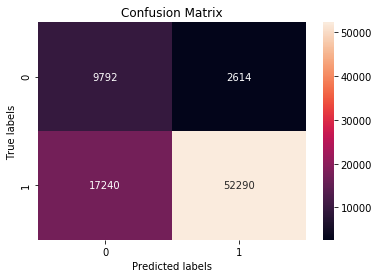

In [75]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
import seaborn as sns
import matplotlib.pyplot as plt
print("="*100)
print("Train confusion matrix")

ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_train, Classifier_bow.predict(X_train_merge )), annot=True, ax = ax,fmt='g');
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
print("="*100)



Test confusion matrix


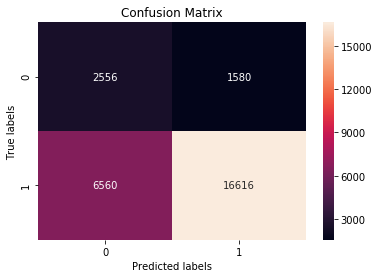

In [76]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
import seaborn as sns
import matplotlib.pyplot as plt
print("="*100)
print("Test confusion matrix")

ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, Classifier_bow.predict(X_test_merge )), annot=True, ax = ax,fmt='g');
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
print("="*100)



### Set 2 : categorical, numerical features + project_title(TFIDF) + preprocessed_essay (TFIDF)


In [77]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train_merge = hstack((categories_one_hot_train, sub_cat_one_hot_train, school_state_one_hot_train, project_grade_cat_one_hot_train, teacher_prefix_cat_one_hot_train, price_data_train, quant_train, prev_no_projects_train,title_tfidf_train, essay_tfidf_train)).tocsr()
X_test_merge = hstack((categories_one_hot_test, sub_cat_one_hot_test, school_state_one_hot_test, project_grade_cat_one_hot_test, teacher_prefix_cat_one_hot_test,price_data_test,quant_test,prev_no_projects_test,title_tfidf_test, essay_tfidf_test)).tocsr()

print("Final Data matrix")
print("="*100)
print(X_train_merge.shape, Y_train.shape)
print(X_test_merge.shape, Y_test.shape)
print("="*100)

Final Data matrix
(81936, 17671) (81936,)
(27312, 17671) (27312,)


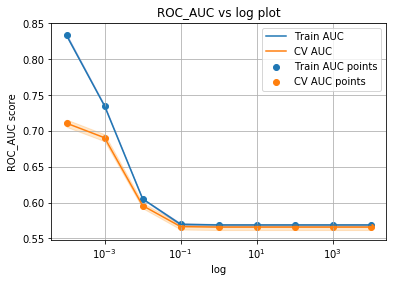

In [78]:
## By using "l2" Regulrizer

import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.model_selection import learning_curve, GridSearchCV

# hyperparameter tuning with l2 reg


sd = SGDClassifier(loss = 'hinge', penalty = 'l2', class_weight = 'balanced')
parameters = {'alpha':[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}
classifier = GridSearchCV(sd, parameters, cv= 3, scoring='roc_auc',return_train_score=True)
classifier.fit(X_train_merge, Y_train);

train_auc = classifier.cv_results_['mean_train_score']
train_auc_std= classifier.cv_results_['std_train_score']
cv_auc = classifier.cv_results_['mean_test_score'] 
cv_auc_std= classifier.cv_results_['std_test_score']


plt.plot(parameters['alpha'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['alpha'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')
plt.plot(parameters['alpha'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['alpha'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')


plt.legend()
plt.xscale('log') 
plt.xlabel("log")
plt.ylabel("ROC_AUC score")
plt.title("ROC_AUC vs log plot")
plt.grid()
plt.show()



In [79]:
score_t_cv = [x for x in cv_auc]
opt_t_cv = parameters['alpha'][score_t_cv.index(max(score_t_cv))]
print("Maximum AUC score of cv is:" + ' ' + str(max(score_t_cv)))
print("Corresponding alpha value of cv is:",opt_t_cv, '\n')
best_alp=opt_t_cv
print(best_alp)


Maximum AUC score of cv is: 0.7105127431646332
Corresponding alpha value of cv is: 0.0001 

0.0001


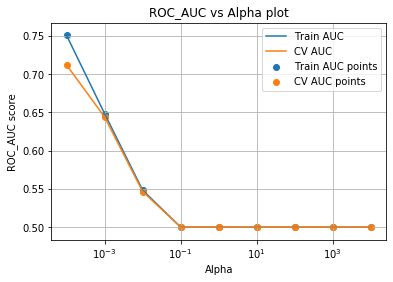

In [80]:
#By using  "l1" Regularization
# hyperparameter tuning with l1 reg
#parameters = {'alpha':[0.007,0.009,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.2,1.4,1.6,1.8,2,2.2,2.4,2.6,2.8,3,3,3.5,4,4.5,5]}
import warnings
warnings.filterwarnings("ignore")
parameters = {'alpha':[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}
sd = SGDClassifier(loss = 'hinge', penalty = 'l1', class_weight = 'balanced')
classifier = GridSearchCV(sd, parameters, cv= 5, scoring='roc_auc',return_train_score=True)
classifier.fit(X_train_merge, Y_train)
train_auc = classifier.cv_results_['mean_train_score']
cv_auc= classifier.cv_results_['mean_test_score']

plt.plot(parameters['alpha'], train_auc, label='Train AUC')
plt.plot(parameters['alpha'], cv_auc, label='CV AUC')


plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("Alpha")
plt.xscale('log')
plt.ylabel("ROC_AUC score")
plt.title("ROC_AUC vs Alpha plot")
plt.grid()
plt.show()



In [81]:
score_t_cv = [x for x in cv_auc]
opt_t_cv = parameters['alpha'][score_t_cv.index(max(score_t_cv))]
print("Maximum AUC score of cv is:" + ' ' + str(max(score_t_cv)))
print("Corresponding alpha value of cv is:",opt_t_cv, '\n')
best_alp=opt_t_cv
print(best_alp)


Maximum AUC score of cv is: 0.7117530756353923
Corresponding alpha value of cv is: 0.0001 

0.0001


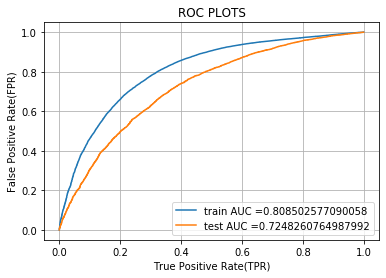

In [82]:
#Fitting Model to Hyper-Parameter Curve
# https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
Classifier_tfidf = SGDClassifier(loss = 'hinge', penalty = 'l2', alpha = 0.0001,class_weight='balanced')
Classifier_tfidf.fit(X_train_merge,Y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred = Classifier_tfidf.decision_function(X_train_merge)
y_test_pred = Classifier_tfidf.decision_function(X_test_merge)

#https://github.com/shashimanyam/SVM-ON-DONORSCHOOSE-DATASET/blob/master/SVM%20ON%20DONORSCHOOSE.ipynb
train_fpr, train_tpr, thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, thresholds = roc_curve(Y_test, y_test_pred)

#https://github.com/shashimanyam/SVM-ON-DONORSCHOOSE-DATASET/blob/master/SVM%20ON%20DONORSCHOOSE.ipynb
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))



plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC PLOTS")
plt.grid()
plt.show()



###  Confusion Matrix


Train confusion matrix


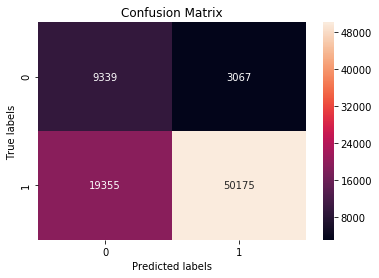

In [83]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
import seaborn as sns
import matplotlib.pyplot as plt
print("="*100)
print("Train confusion matrix")

ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_train, Classifier_tfidf.predict(X_train_merge )), annot=True, ax = ax,fmt='g');
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
print("="*100)



Train confusion matrix


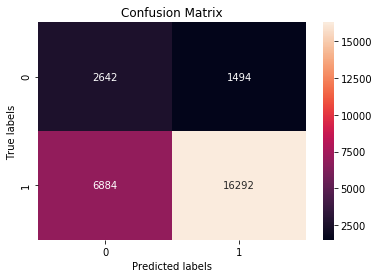

In [84]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
import seaborn as sns
import matplotlib.pyplot as plt
print("="*100)
print("Train confusion matrix")

ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, Classifier_tfidf.predict(X_test_merge )), annot=True, ax = ax,fmt='g');
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
print("="*100)



### ### Set 3 : categorical, numerical features + project_title( AVG W2V) + preprocessed_essay ( AVG W2V)
 


In [85]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train_merge = hstack((categories_one_hot_train, sub_cat_one_hot_train, school_state_one_hot_train, project_grade_cat_one_hot_train, teacher_prefix_cat_one_hot_train, price_data_train, quant_train, prev_no_projects_train,title_avg_w2v_train, essay_avg_w2v_train)).tocsr()
X_test_merge = hstack((categories_one_hot_test, sub_cat_one_hot_test, school_state_one_hot_test, project_grade_cat_one_hot_test, teacher_prefix_cat_one_hot_test, price_data_test, quant_test, prev_no_projects_test,title_avg_w2v_test, essay_avg_w2v_test)).tocsr()

print("Final Data matrix")
print("="*100)
print(X_train_merge.shape, Y_train.shape)
print(X_test_merge.shape, Y_test.shape)
print("="*100)

Final Data matrix
(81936, 703) (81936,)
(27312, 703) (27312,)


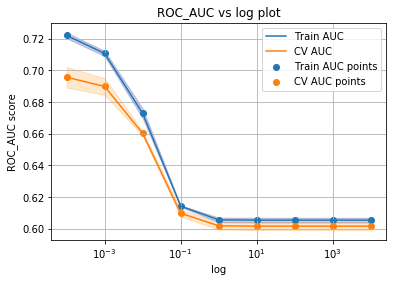

In [86]:
## By using "l2" Regulrizer

import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.model_selection import learning_curve, GridSearchCV

# hyperparameter tuning with l2 reg


sd = SGDClassifier(loss = 'hinge', penalty = 'l2', class_weight = 'balanced')
parameters = {'alpha':[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}
classifier = GridSearchCV(sd, parameters, cv= 3, scoring='roc_auc',return_train_score=True)
classifier.fit(X_train_merge, Y_train);

train_auc = classifier.cv_results_['mean_train_score']
train_auc_std= classifier.cv_results_['std_train_score']
cv_auc = classifier.cv_results_['mean_test_score'] 
cv_auc_std= classifier.cv_results_['std_test_score']


plt.plot(parameters['alpha'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['alpha'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')
plt.plot(parameters['alpha'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['alpha'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')


plt.legend()
plt.xscale('log') 
plt.xlabel("log")
plt.ylabel("ROC_AUC score")
plt.title("ROC_AUC vs log plot")
plt.grid()
plt.show()



In [87]:
score_t_cv = [x for x in cv_auc]
opt_t_cv = parameters['alpha'][score_t_cv.index(max(score_t_cv))]
print("Maximum AUC score of cv is:" + ' ' + str(max(score_t_cv)))
print("Corresponding lambda value of cv is:",opt_t_cv, '\n')
best_alp=opt_t_cv
print(best_alp)


Maximum AUC score of cv is: 0.6956840201332198
Corresponding lambda value of cv is: 0.0001 

0.0001


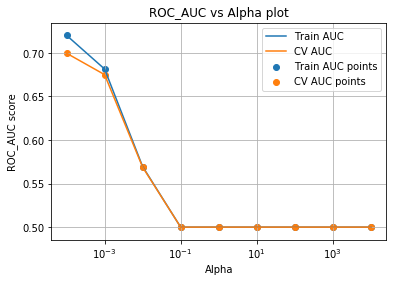

In [88]:
#By using  "l1" Regularization
# hyperparameter tuning with l1 reg
#parameters = {'alpha':[0.007,0.009,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.2,1.4,1.6,1.8,2,2.2,2.4,2.6,2.8,3,3,3.5,4,4.5,5]}
import warnings
warnings.filterwarnings("ignore")
parameters = {'alpha':[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}
sd = SGDClassifier(loss = 'hinge', penalty = 'l1', class_weight = 'balanced')
classifier = GridSearchCV(sd, parameters, cv= 5, scoring='roc_auc',return_train_score=True)
classifier.fit(X_train_merge, Y_train)
train_auc = classifier.cv_results_['mean_train_score']
cv_auc= classifier.cv_results_['mean_test_score']

plt.plot(parameters['alpha'], train_auc, label='Train AUC')
plt.plot(parameters['alpha'], cv_auc, label='CV AUC')


plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("Alpha")
plt.xscale('log')
plt.ylabel("ROC_AUC score")
plt.title("ROC_AUC vs Alpha plot")
plt.grid()
plt.show()



In [89]:
score_t_cv = [x for x in cv_auc]
opt_t_cv = parameters['alpha'][score_t_cv.index(max(score_t_cv))]
print("Maximum AUC score of cv is:" + ' ' + str(max(score_t_cv)))
print("Corresponding lambda value of cv is:",opt_t_cv, '\n')
best_alp=opt_t_cv
print(best_alp)


Maximum AUC score of cv is: 0.6996483934270612
Corresponding lambda value of cv is: 0.0001 

0.0001


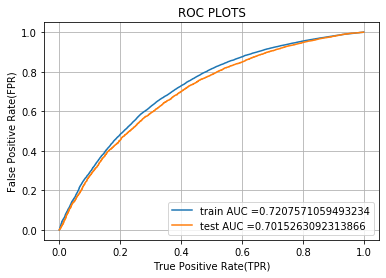

In [90]:
#Fitting Model to Hyper-Parameter Curve
# https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
Classifier_avg_w2v = SGDClassifier(loss = 'hinge', penalty = 'l2', alpha = 0.0001,class_weight='balanced')
Classifier_avg_w2v.fit(X_train_merge,Y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred = Classifier_avg_w2v.decision_function(X_train_merge)
y_test_pred = Classifier_avg_w2v.decision_function(X_test_merge)

#https://github.com/shashimanyam/SVM-ON-DONORSCHOOSE-DATASET/blob/master/SVM%20ON%20DONORSCHOOSE.ipynb
train_fpr, train_tpr, thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, thresholds = roc_curve(Y_test, y_test_pred)

#https://github.com/shashimanyam/SVM-ON-DONORSCHOOSE-DATASET/blob/master/SVM%20ON%20DONORSCHOOSE.ipynb
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))



plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC PLOTS")
plt.grid()
plt.show()



###  Confusion Matrix


Train confusion matrix


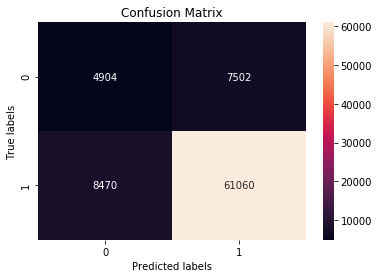

In [91]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
import seaborn as sns
import matplotlib.pyplot as plt
print("="*100)
print("Train confusion matrix")

ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_train, Classifier_avg_w2v.predict(X_train_merge )), annot=True, ax = ax,fmt='g');
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
print("="*100)



Train confusion matrix


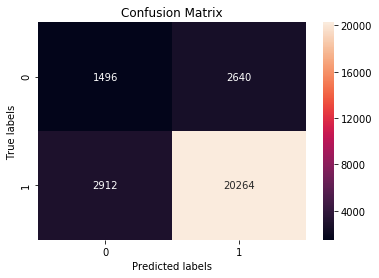

In [92]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
import seaborn as sns
import matplotlib.pyplot as plt
print("="*100)
print("Train confusion matrix")

ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, Classifier_avg_w2v.predict(X_test_merge )), annot=True, ax = ax,fmt='g');
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
print("="*100)




### ### Set 4 : categorical, numerical features + project_title( TFIDF W2V) + preprocessed_essay ( TFIDF W2V)


In [93]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train_merge = hstack((categories_one_hot_train, sub_cat_one_hot_train, school_state_one_hot_train, project_grade_cat_one_hot_train, teacher_prefix_cat_one_hot_train, price_data_train, quant_train, prev_no_projects_train,title_tfidf_w2v_train, essay_tfidf_w2v_train)).tocsr()
X_test_merge = hstack((categories_one_hot_test, sub_cat_one_hot_test, school_state_one_hot_test, project_grade_cat_one_hot_test, teacher_prefix_cat_one_hot_test, price_data_test, quant_test, prev_no_projects_test,title_tfidf_w2v_test, essay_tfidf_w2v_test)).tocsr()

print("Final Data matrix")
print("="*100)
print(X_train_merge.shape, Y_train.shape)
print(X_test_merge.shape, Y_test.shape)
print("="*100)

Final Data matrix
(81936, 703) (81936,)
(27312, 703) (27312,)


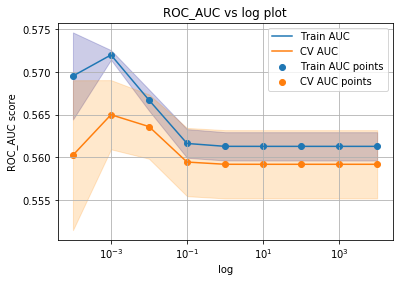

In [94]:
## By using "l2" Regulrizer

import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.model_selection import learning_curve, GridSearchCV

# hyperparameter tuning with l2 reg


sd = SGDClassifier(loss = 'hinge', penalty = 'l2', class_weight = 'balanced')
parameters = {'alpha':[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}
classifier = GridSearchCV(sd, parameters, cv= 3, scoring='roc_auc',return_train_score=True)
classifier.fit(X_train_merge, Y_train);

train_auc = classifier.cv_results_['mean_train_score']
train_auc_std= classifier.cv_results_['std_train_score']
cv_auc = classifier.cv_results_['mean_test_score'] 
cv_auc_std= classifier.cv_results_['std_test_score']


plt.plot(parameters['alpha'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['alpha'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')
plt.plot(parameters['alpha'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['alpha'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')


plt.legend()
plt.xscale('log') 
plt.xlabel("log")
plt.ylabel("ROC_AUC score")
plt.title("ROC_AUC vs log plot")
plt.grid()
plt.show()



In [95]:
score_t_cv = [x for x in cv_auc]
opt_t_cv = parameters['alpha'][score_t_cv.index(max(score_t_cv))]
print("Maximum AUC score of cv is:" + ' ' + str(max(score_t_cv)))
print("Corresponding lambda value of cv is:",opt_t_cv, '\n')
best_alp=opt_t_cv
print(best_alp)


Maximum AUC score of cv is: 0.5650068963739008
Corresponding lambda value of cv is: 0.001 

0.001


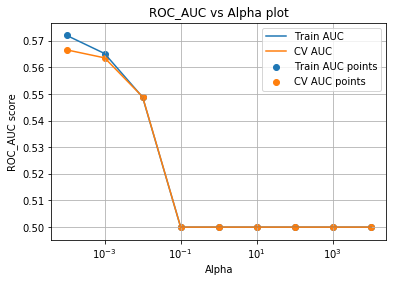

In [96]:
#By using  "l1" Regularization
# hyperparameter tuning with l1 reg
#parameters = {'alpha':[0.007,0.009,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.2,1.4,1.6,1.8,2,2.2,2.4,2.6,2.8,3,3,3.5,4,4.5,5]}
import warnings
warnings.filterwarnings("ignore")
parameters = {'alpha':[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}
sd = SGDClassifier(loss = 'hinge', penalty = 'l1', class_weight = 'balanced')
classifier = GridSearchCV(sd, parameters, cv= 5, scoring='roc_auc',return_train_score=True)
classifier.fit(X_train_merge, Y_train)
train_auc = classifier.cv_results_['mean_train_score']
cv_auc= classifier.cv_results_['mean_test_score']

plt.plot(parameters['alpha'], train_auc, label='Train AUC')
plt.plot(parameters['alpha'], cv_auc, label='CV AUC')


plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("Alpha")
plt.xscale('log')
plt.ylabel("ROC_AUC score")
plt.title("ROC_AUC vs Alpha plot")
plt.grid()
plt.show()



In [97]:
score_t_cv = [x for x in cv_auc]
opt_t_cv = parameters['alpha'][score_t_cv.index(max(score_t_cv))]
print("Maximum AUC score of cv is:" + ' ' + str(max(score_t_cv)))
print("Corresponding lambda value of cv is:",opt_t_cv, '\n')
best_alp=opt_t_cv
print(best_alp)


Maximum AUC score of cv is: 0.5665646708593235
Corresponding lambda value of cv is: 0.0001 

0.0001


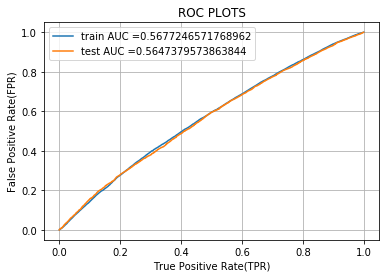

In [98]:
#Fitting Model to Hyper-Parameter Curve
# https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
Classifier_tfidf_w2v = SGDClassifier(loss = 'hinge', penalty = 'l2', alpha = 0.001,class_weight='balanced' )
Classifier_tfidf_w2v.fit(X_train_merge,Y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred = Classifier_tfidf_w2v.decision_function(X_train_merge)
y_test_pred = Classifier_tfidf_w2v.decision_function(X_test_merge)

#https://github.com/shashimanyam/SVM-ON-DONORSCHOOSE-DATASET/blob/master/SVM%20ON%20DONORSCHOOSE.ipynb
train_fpr, train_tpr, thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, thresholds = roc_curve(Y_test, y_test_pred)

#https://github.com/shashimanyam/SVM-ON-DONORSCHOOSE-DATASET/blob/master/SVM%20ON%20DONORSCHOOSE.ipynb
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))



plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC PLOTS")
plt.grid()
plt.show()



###  Confusion Matrix


Train confusion matrix


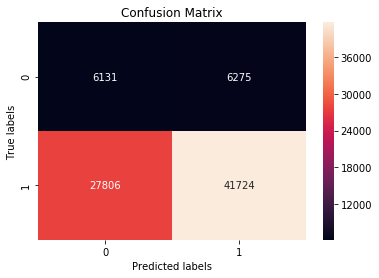

In [99]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
import seaborn as sns
import matplotlib.pyplot as plt
print("="*100)
print("Train confusion matrix")

ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_train, Classifier_tfidf_w2v.predict(X_train_merge )), annot=True, ax = ax,fmt='g');
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
print("="*100)



Train confusion matrix


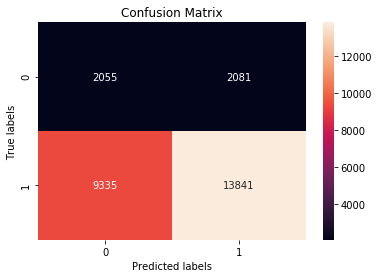

In [100]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
import seaborn as sns
import matplotlib.pyplot as plt
print("="*100)
print("Train confusion matrix")

ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, Classifier_tfidf_w2v.predict(X_test_merge )), annot=True, ax = ax,fmt='g');
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
print("="*100)



### New feature(No. of words in title)


In [101]:
#https://github.com/shashimanyam/SVM-ON-DONORSCHOOSE-DATASET/blob/master/SVM%20ON%20DONORSCHOOSE.ipynb
# For train data
title_length_train=[]
for i in range(0,81936):
    title_length_train.append(len(X_train["project_title"][i].split()))

    
title_length_train=np.array(title_length_train)
print(title_length_train.shape)
#for test data titles
title_length_test=[]
for i in range(0,27312):
    title_length_test.append(len(X_test["project_title"][i].split()))

title_length_test=np.array(title_length_test)
print(title_length_test.shape)




(81936,)
(27312,)


### New feature( No. of words in combined essays)


In [102]:
# https://github.com/shashimanyam/LOISTIC-RREGRESSION-ON-DONORS-CHOOSE-DATASET/blob/master/LOGISTIC%20REGRESSION%20ON%20DONORSCHOOSEee.ipynb

# For train data
essay_length_train=[]
for i in range(0,81936):
    essay_length_train.append(len(X_train["essay"][i].split()))
    
essay_length_train=np.array(essay_length_train)
print(essay_length_train.shape)
#for test data titles
essay_length_test=[]
for i in range(0,27312):
    essay_length_test.append(len(X_test["essay"][i].split()))

essay_length_test=np.array(essay_length_test)
print(essay_length_test.shape)




(81936,)
(27312,)


### New feature(Sentiment scores of each combined essay's)


In [103]:
import warnings
warnings.filterwarnings('ignore')
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')


#https://www.programcreek.com/python/example/100005/nltk.sentiment.vader.SentimentIntensityAnalyzer
def analyze_sentiment(df):
    sentiments = []
    sid = SentimentIntensityAnalyzer()
    for i in range(df.shape[0]):
        line = df['essay'][i]# take one essay
        sentiment = sid.polarity_scores(line)# calculate the sentiment
        sentiments.append([sentiment['neg'], sentiment['pos'],sentiment['neu'], sentiment['compound']])# list of lists
    df[['neg', 'pos', 'neu', 'compound']] = pd.DataFrame(sentiments)
    df['Negative'] = df['compound'] < -0.1
    df['Positive'] = df['compound'] > 0.1
    return df


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [0]:
X_train=analyze_sentiment(X_train)
X_test=analyze_sentiment(X_test)


 ## Apply TruncatedSVD on TfidfVectorizer of essay text, choose the number of components ( n_components ) using elbow method :numerical data


In [105]:
#https://github.com/shashimanyam/SVM-ON-DONORSCHOOSE-DATASET/blob/master/SVM%20ON%20DONORSCHOOSE.ipynb
#Dimensions are very large so thats why i take less here.
essay_tfidf_train=essay_tfidf_train[:,0:4000]
essay_tfidf_test=essay_tfidf_test[:,0:4000]

from sklearn.decomposition import TruncatedSVD
#https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html
#declaring index as Dimensions in train_text_tfidf
Di = [25,50,100,200,500,1500,2000,2500]
Varience_sum = []
for i in tqdm(Di):
    svd = TruncatedSVD(n_components = i, random_state = 42)
    svd.fit(essay_tfidf_train)
    Varience_sum.append(svd.explained_variance_ratio_.sum())



100%|██████████| 8/8 [09:23<00:00, 128.43s/it]


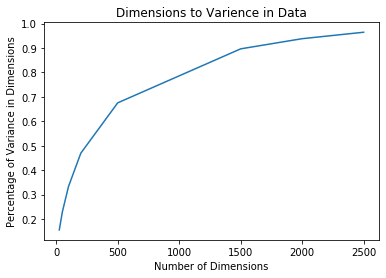

In [106]:
plt.xlabel("Number of Dimensions")
plt.ylabel("Percentage of Variance in Dimensions")
plt.title("Dimensions to Varience in Data")
plt.plot(Di,Varience_sum)
plt.show()


In [0]:
svd = TruncatedSVD(n_components= 2000)
svd.fit(essay_tfidf_train)
#Transforms:
#Train SVD
essay_tfidf_train= svd.transform(essay_tfidf_train )
#Test SVD
essay_tfidf_test = svd.transform(essay_tfidf_test )



In [108]:
#for train
pos_tr=list(X_train['pos'])
pos_tr=np.array(pos_tr)
neg_tr=list(X_train['neg'])
neg_tr=np.array(neg_tr)
neu_tr=list(X_train['neu'])
neu_tr=np.array(neu_tr)
com_tr=list(X_train['compound'])
com_tr=np.array(com_tr)


#for test
pos_tes=list(X_test['pos'])
pos_tes=np.array(pos_tes)
neg_tes=list(X_test['neg'])
neg_tes=np.array(neg_tes)
neu_tes=list(X_test['neu'])                 
neu_tes=np.array(neu_tes)                 
com_tes=list(X_test['compound'])
com_tes=np.array(com_tes)





# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_train_merge = hstack((categories_one_hot_train, sub_cat_one_hot_train, school_state_one_hot_train, project_grade_cat_one_hot_train, teacher_prefix_cat_one_hot_train, price_data_train, quant_train, prev_no_projects_train,essay_tfidf_train,title_length_train.reshape(-1,1), essay_length_train.reshape(-1,1),pos_tr.reshape(-1,1),neg_tr.reshape(-1,1),com_tr.reshape(-1,1))).tocsr()
X_test_merge = hstack((categories_one_hot_test, sub_cat_one_hot_test, school_state_one_hot_test, project_grade_cat_one_hot_test, teacher_prefix_cat_one_hot_test, price_data_test, quant_test,essay_tfidf_test, prev_no_projects_test,title_length_test.reshape(-1,1), essay_length_test.reshape(-1,1),pos_tes.reshape(-1,1),neg_tes.reshape(-1,1),com_tes.reshape(-1,1))).tocsr()

print("Final Data matrix")
print("="*100)
print(X_train_merge.shape, Y_train.shape)
print(X_test_merge.shape, Y_test.shape)
print("="*100)




Final Data matrix
(81936, 2108) (81936,)
(27312, 2108) (27312,)


### logistic regression on SET 5


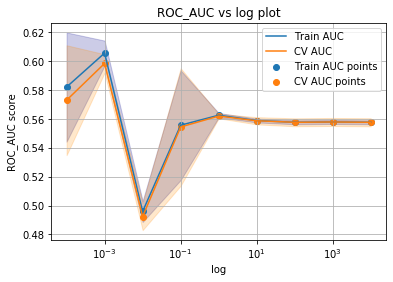

In [109]:
## By using "l2" Regulrizer

import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.model_selection import learning_curve, GridSearchCV

# hyperparameter tuning with l2 reg


sd = SGDClassifier(loss = 'hinge', penalty = 'l2', class_weight = 'balanced')
parameters = {'alpha':[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}
classifier = GridSearchCV(sd, parameters, cv= 3, scoring='roc_auc',return_train_score=True)
classifier.fit(X_train_merge, Y_train);

train_auc = classifier.cv_results_['mean_train_score']
train_auc_std= classifier.cv_results_['std_train_score']
cv_auc = classifier.cv_results_['mean_test_score'] 
cv_auc_std= classifier.cv_results_['std_test_score']


plt.plot(parameters['alpha'], train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['alpha'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')
plt.plot(parameters['alpha'], cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(parameters['alpha'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')
plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')


plt.legend()
plt.xscale('log') 
plt.xlabel("log")
plt.ylabel("ROC_AUC score")
plt.title("ROC_AUC vs log plot")
plt.grid()
plt.show()



In [110]:
score_t_cv = [x for x in cv_auc]
opt_t_cv = parameters['alpha'][score_t_cv.index(max(score_t_cv))]
print("Maximum AUC score of cv is:" + ' ' + str(max(score_t_cv)))
print("Corresponding lambda value of cv is:",opt_t_cv, '\n')
best_alp=opt_t_cv
print(best_alp)


Maximum AUC score of cv is: 0.5983915069658899
Corresponding lambda value of cv is: 0.001 

0.001


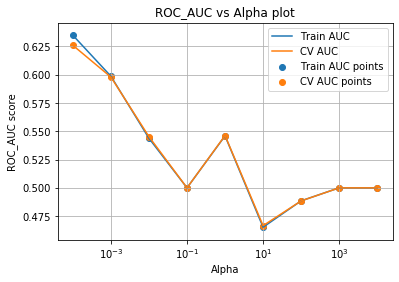

In [111]:
#By using  "l1" Regularization
# hyperparameter tuning with l1 reg
#parameters = {'alpha':[0.007,0.009,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.2,1.4,1.6,1.8,2,2.2,2.4,2.6,2.8,3,3,3.5,4,4.5,5]}
import warnings
warnings.filterwarnings("ignore")
parameters = {'alpha':[10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}
sd = SGDClassifier(loss = 'hinge', penalty = 'l1', class_weight = 'balanced')
classifier = GridSearchCV(sd, parameters, cv= 5, scoring='roc_auc',return_train_score=True)
classifier.fit(X_train_merge, Y_train)
train_auc = classifier.cv_results_['mean_train_score']
cv_auc= classifier.cv_results_['mean_test_score']

plt.plot(parameters['alpha'], train_auc, label='Train AUC')
plt.plot(parameters['alpha'], cv_auc, label='CV AUC')


plt.scatter(parameters['alpha'], train_auc, label='Train AUC points')
plt.scatter(parameters['alpha'], cv_auc, label='CV AUC points')
plt.legend()
plt.xlabel("Alpha")
plt.xscale('log')
plt.ylabel("ROC_AUC score")
plt.title("ROC_AUC vs Alpha plot")
plt.grid()
plt.show()



In [112]:
score_t_cv = [x for x in cv_auc]
opt_t_cv = parameters['alpha'][score_t_cv.index(max(score_t_cv))]
print("Maximum AUC score of cv is:" + ' ' + str(max(score_t_cv)))
print("Corresponding lambda value of cv is:",opt_t_cv, '\n')
best_alp=opt_t_cv
print(best_alp)


Maximum AUC score of cv is: 0.6258060342765036
Corresponding lambda value of cv is: 0.0001 

0.0001


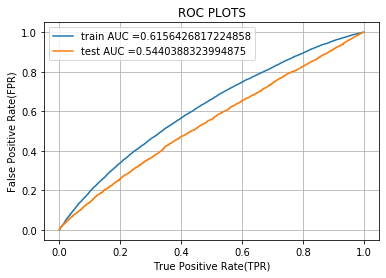

In [113]:
#Fitting Model to Hyper-Parameter Curve
# https://scikitlearn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
Classifier_5 = SGDClassifier(loss = 'hinge', penalty = 'l2', alpha = 0.0001,class_weight="balanced")
Classifier_5.fit(X_train_merge,Y_train)

# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs
y_train_pred = Classifier_5.decision_function(X_train_merge)
y_test_pred = Classifier_5.decision_function(X_test_merge)

#https://github.com/shashimanyam/SVM-ON-DONORSCHOOSE-DATASET/blob/master/SVM%20ON%20DONORSCHOOSE.ipynb
train_fpr, train_tpr, thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, thresholds = roc_curve(Y_test, y_test_pred)

#https://github.com/shashimanyam/SVM-ON-DONORSCHOOSE-DATASET/blob/master/SVM%20ON%20DONORSCHOOSE.ipynb
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))



plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("ROC PLOTS")
plt.grid()
plt.show()



###  Confusion Matrix


Train confusion matrix


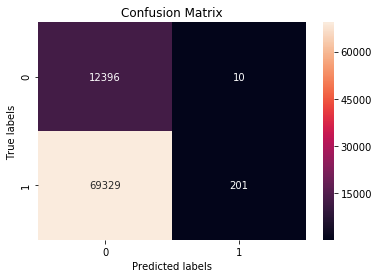

In [114]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
import seaborn as sns
import matplotlib.pyplot as plt
print("="*100)
print("Train confusion matrix")

ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_train, Classifier_5.predict(X_train_merge )), annot=True, ax = ax,fmt='g');
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
print("="*100)



Train confusion matrix


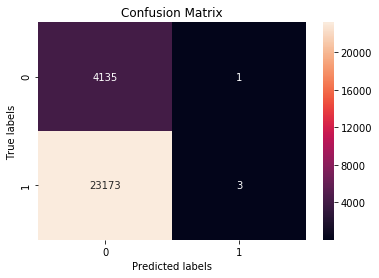

In [115]:
#https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix
import seaborn as sns
import matplotlib.pyplot as plt
print("="*100)
print("Train confusion matrix")

ax= plt.subplot()
sns.heatmap(confusion_matrix(Y_test, Classifier_5.predict(X_test_merge )), annot=True, ax = ax,fmt='g');
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
print("="*100)



### 3. Conclusions


In [116]:
# Please compare all your models using Prettytable library
# Please compare all your models using Prettytable library
#how to use pretty table http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

tb = PrettyTable()
tb.field_names= ("Vectorizer", "Model", "HyperParameter L1", "AUC L1","HyperParameter L2","AUC L2")
tb.add_row(["BOW", "Auto",0.0001, 65.02,0.01,71.6])
tb.add_row(["Tf-Idf", "Auto",0.0001, 69.89,0.0001,68.99])
tb.add_row(["AVGW2V", "Auto",0.0001, 67.79,0.001,68.0])
tb.add_row(["Tf-Idf w2v", "Auto", 0.001, 56.79,0.001,0.5692])
tb.add_row(["Set 5", "Auto",0.0001, 58.1,0.0001,57.48])
print(tb.get_string(titles = "Logistic Reg> - Observations"))



+------------+-------+-------------------+--------+-------------------+--------+
| Vectorizer | Model | HyperParameter L1 | AUC L1 | HyperParameter L2 | AUC L2 |
+------------+-------+-------------------+--------+-------------------+--------+
|    BOW     |  Auto |       0.0001      | 65.02  |        0.01       |  71.6  |
|   Tf-Idf   |  Auto |       0.0001      | 69.89  |       0.0001      | 68.99  |
|   AVGW2V   |  Auto |       0.0001      | 67.79  |       0.001       |  68.0  |
| Tf-Idf w2v |  Auto |       0.001       | 56.79  |       0.001       | 0.5692 |
|   Set 5    |  Auto |       0.0001      |  58.1  |       0.0001      | 57.48  |
+------------+-------+-------------------+--------+-------------------+--------+
